한글설정

In [ ]:

# 1. 코렙에서 한글 폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 2. 설치가 다 되면 메뉴-런타임-런타임 다시시작


In [1]:
# 3. 한글폰트 적용하기
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [ ]:
!unzip '/content/drive/MyDrive/소상공인시장진흥공단_상가(상권)정보_20230630.zip'

In [3]:
from glob import glob

In [4]:
fpath = glob('/content/╗є░б(╗є▒╟)┴д║╕_20230630/*.csv')

In [6]:
import pandas as pd
pd_lists = [pd.read_csv(frow,low_memory=False) for frow in fpath]

In [7]:
df = pd.concat(pd_lists)

In [9]:
df = df.reset_index(drop=True)

In [13]:
df.describe(include='object')

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,층정보
count,2417759,2417758,16848,2417759,2417759,2417759,2417759,2417759,2417759,2417397,...,2417759,2417759,2417759,2417759,2417759,2417759,2417698,826723,2417759,1188001
unique,2417759,1569003,1584,10,10,75,75,247,247,478,...,228,3164,3920,2,1074223,113417,1055456,143348,1055342,341
top,MA0101202210A0010139,컴퓨터수리,코리아,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,중구,중앙동,중동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,1171010800105600000000001,롯데백화점,서울특별시 송파구 충민로 66,1
freq,1,1392,894,790274,790274,322709,322709,150729,150729,229251,...,74144,43989,16845,2411849,957,3900,1202,1959,1202,722004


In [38]:
col_views = ['상호명','시도명','상권업종대분류명','상권업종중분류명', '상권업종소분류명', '시군구명','행정동명','법정동명','지번주소', '위도','경도']
df2 = df[col_views]
df2.head()

,상호명,시도명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시군구명,행정동명,법정동명,지번주소,위도,경도
0,카라노래주점,경상남도,음식,주점,일반 유흥 주점,김해시,장유2동,대청동,경상남도 김해시 대청동 64-6,35.194724,128.801248
1,원탑공인중개사사무소,경상남도,부동산,부동산 서비스,부동산 중개/대리업,창원시 진해구,석동,석동,경상남도 창원시 진해구 석동 186-4,35.153600,128.702613
2,아이에프엠,경상남도,과학·기술,광고,광고 대행업,창원시 마산회원구,양덕1동,양덕동,경상남도 창원시 마산회원구 양덕동 15-27,35.231915,128.583846
3,부림옷수선,경상남도,수리·개인,기타 가정용품 수리,의류/이불 수선업,창원시 마산합포구,오동동,부림동,경상남도 창원시 마산합포구 부림동 32-1,35.205797,128.573478
4,성모쑥뜸방,경상남도,보건의료,기타 보건,유사 의료업,진주시,성북동,봉곡동,경상남도 진주시 봉곡동 10-9,35.196313,128.076649


In [39]:
# 결측치 시각화 라이브러리
!pip install missingno

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

<Axes: >

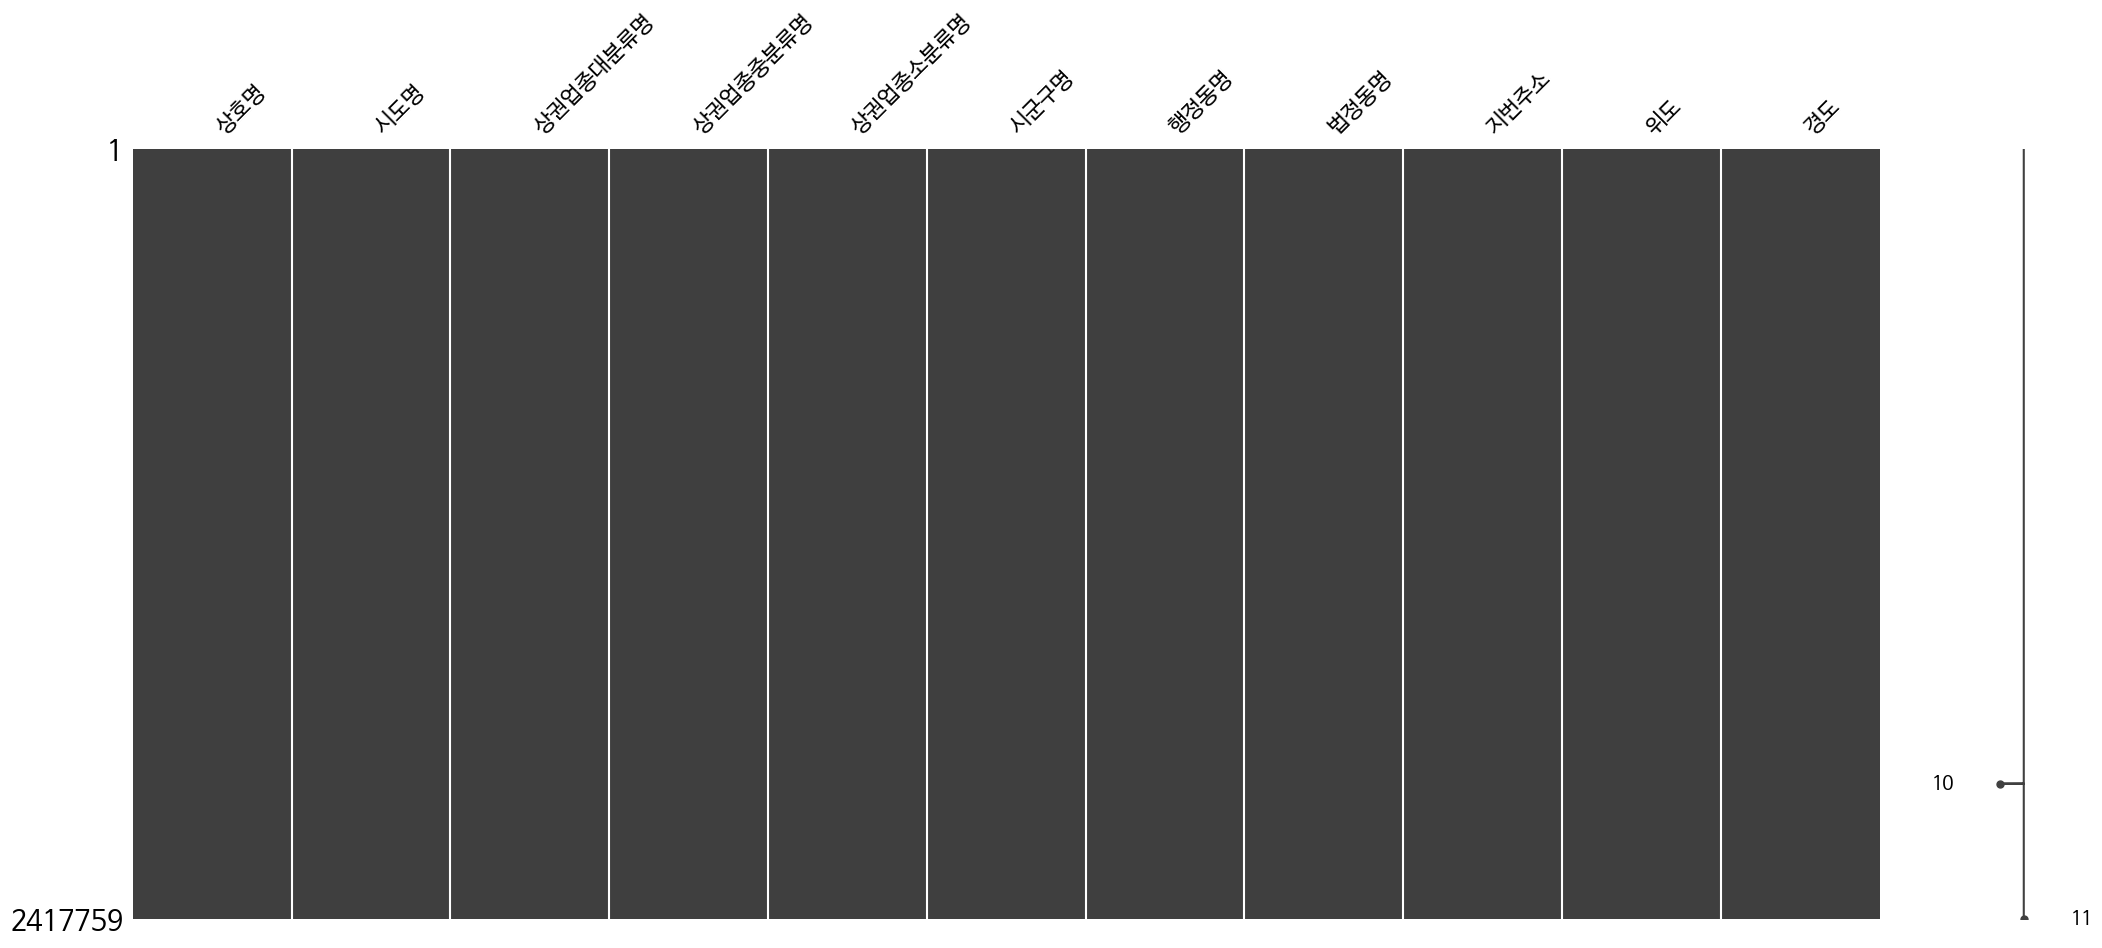

In [41]:
msno.matrix(df2)

In [42]:
df2.isnull().sum()

상호명         1
시도명         0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
시군구명        0
행정동명        0
법정동명        0
지번주소        0
위도          0
경도          0
dtype: int64

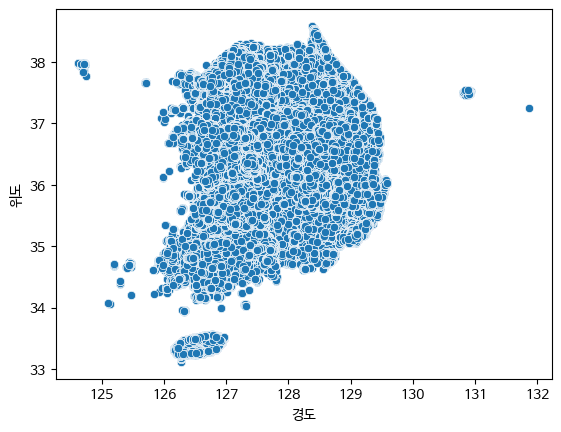

In [43]:
# 좌표를 scatter plot
sns.scatterplot(data=df2,x='경도', y='위도')
plt.show()

In [44]:
#서울지역만 추출
df2['시도명'].unique()

array(['경상남도', '제주특별자치도', '강원특별자치도', '서울특별시', '인천광역시', '세종특별자치시', '울산광역시',
       '경기도', '대구광역시', '충청북도', '광주광역시', '전라남도', '부산광역시', '전라북도', '충청남도',
       '경상북도', '대전광역시'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


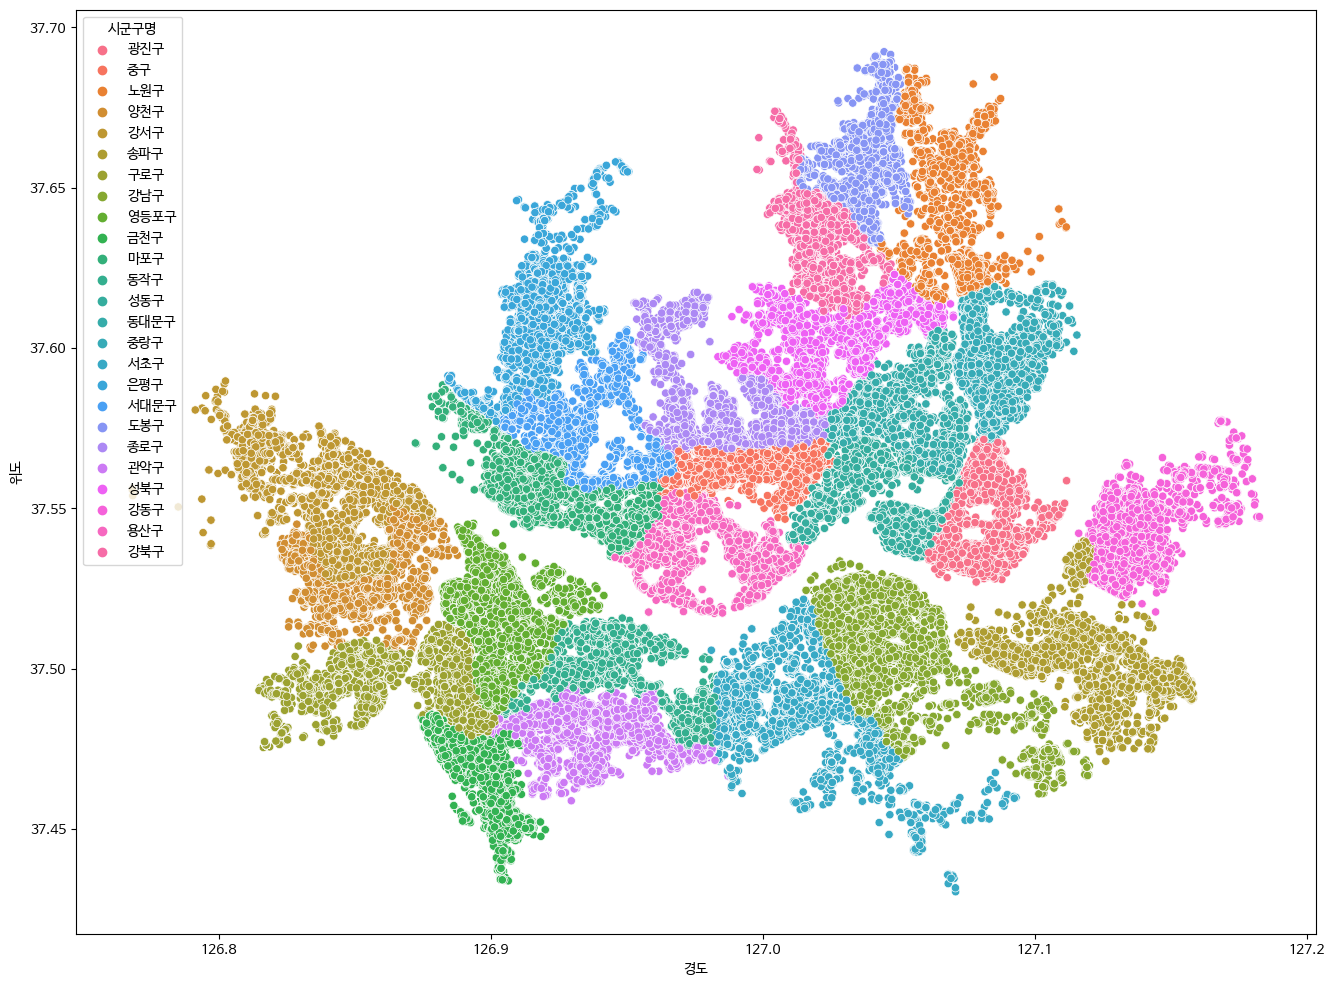

In [45]:
df2_seoul = df2[df2['시도명'] == '서울특별시']
plt.figure(figsize=(16,12))
sns.scatterplot(data=df2_seoul,x='경도', y='위도', hue='시군구명')
plt.show()

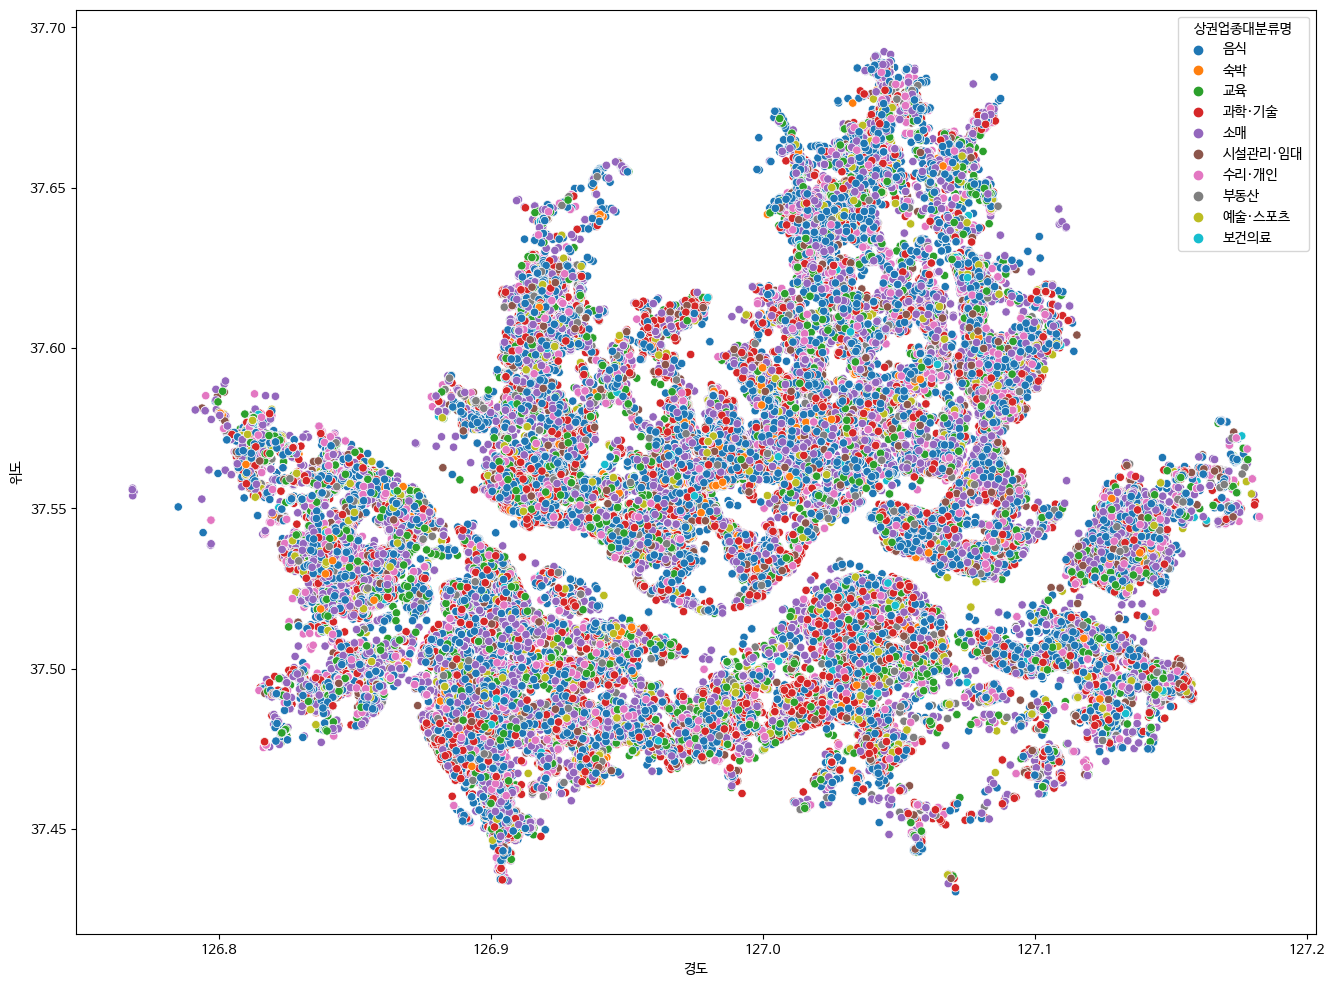

In [46]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df2_seoul,x='경도', y='위도', hue='상권업종대분류명')
plt.show()

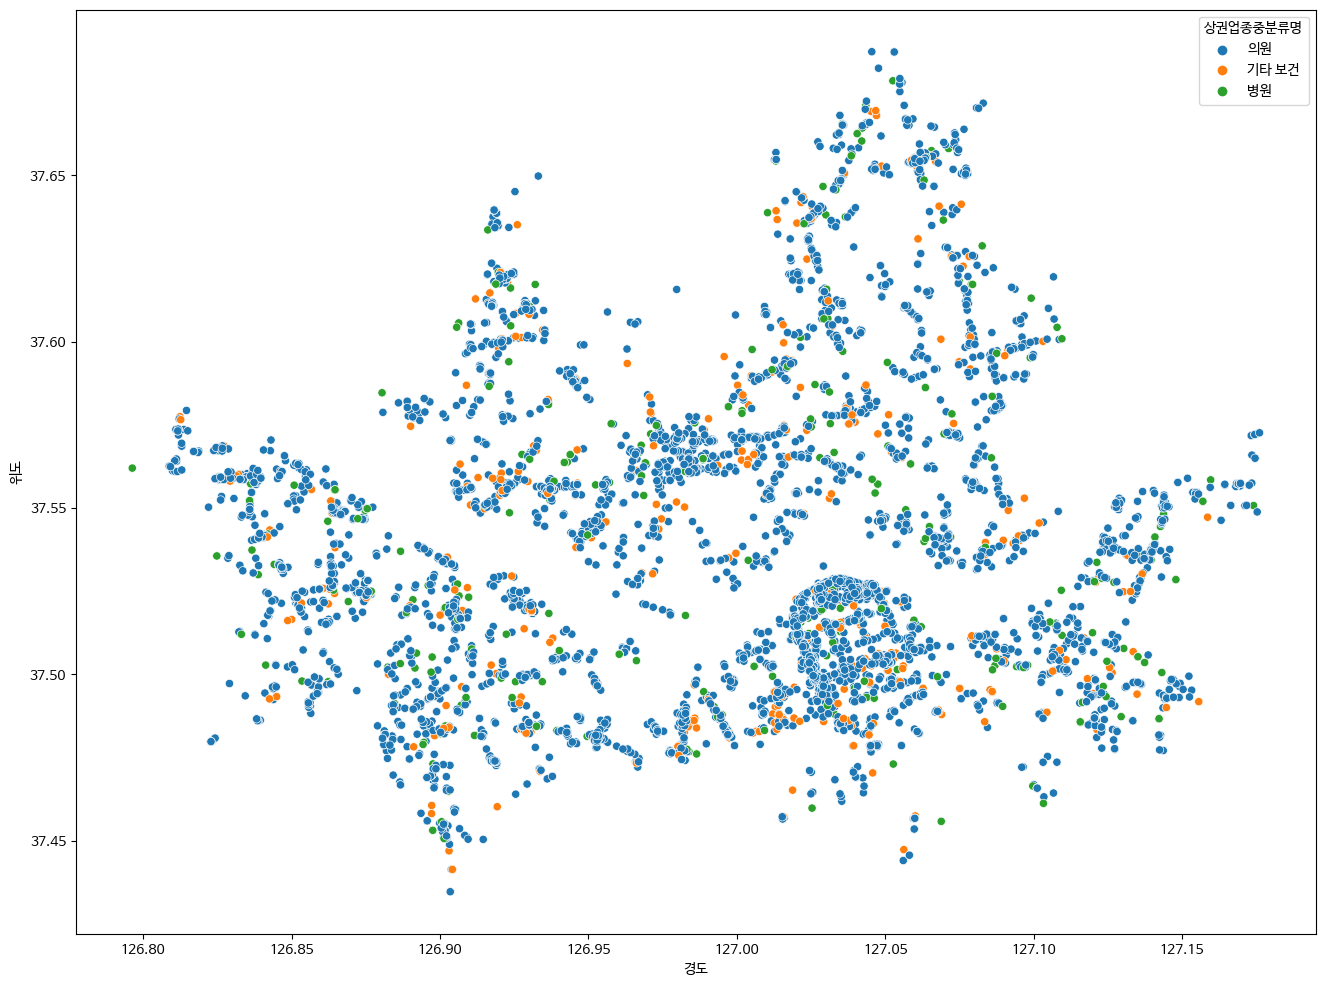

In [48]:
plt.figure(figsize=(16,12))
temp = df2_seoul[df2_seoul['상권업종대분류명'] == '보건의료']
sns.scatterplot(data=temp,x='경도', y='위도', hue='상권업종중분류명')
plt.show()

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium

In [ ]:
pd.options.display.max_columns = None

In [ ]:
[colname for colname in df.columns if '코드' in colname ]

['상권업종대분류코드',
 '상권업종중분류코드',
 '상권업종소분류코드',
 '표준산업분류코드',
 '시도코드',
 '시군구코드',
 '행정동코드',
 '법정동코드',
 '지번코드',
 '대지구분코드',
 '도로명코드']

In [ ]:
df2 =  df.drop(columns= [colname for colname in df.columns if '코드' in colname ],axis=1  )
df2.head(1)

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df2,x='상권업종대분류명')
# df2['상권업종대분류명'].value_counts()

In [ ]:
sns.catplot(data=df2,x='상권업종대분류명',kind='count',col='시도명',col_wrap=4)

업종중에 커피관련된 업종

In [ ]:
df2.isna().mean()

In [ ]:
df3 = df2.dropna(subset=['상호명'])
df3.shape

(2417758, 28)

In [ ]:
df3.loc[df3['상호명'].str.contains('스타벅스'),'시도명']

In [ ]:
df.loc[df['상호명'].str.contains('스타벅스'),'시도명']

ValueError: ignored